___
# MINIPROJETO 1

## <font color='red'>Cauê Citrini Lacava</font>
___

## <font color='blue'>Latitude do momento de início dos Tornados nos Estados Unidos de 1996 a 2013</font>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import itertools

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/CaueCitrini/Documents/Graduação Insper/Segundo Semetre 2016:2/Ciência dos Dados/CD/Miniprojeto


In [2]:
tornadoes = pd.read_csv("tornadoes_96_2013.csv")
lat = tornadoes['Starting Latitude']
latitude_ini = pd.Series(data=sorted(lat))

### Determinando Parâmetros para Função Normal e Gamma

___

In [3]:
# Normal (loc=média, scale=desvio padrão)
media = latitude_ini.mean()

desvio = latitude_ini.std()

# Gamma (a=k_gamma, loc=valor de referência inicial, scale=theta_gamma,)
stats.gamma.fit(latitude_ini)

(8.3329310715250386, 25.361341274607465, 1.3948472194030259)

___

### Gráfico das Distribuições Teóricas Normal e Gamma

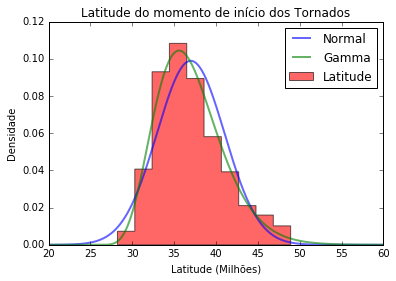

In [9]:
# Plotar Normal
x=np.linspace(20,60,1000)
normal = stats.norm.pdf(x, loc=media, scale=desvio)

# Plotar Gamma
f = np.linspace(20, 60,1000)
gamma = stats.gamma.pdf(f, scale=stats.gamma.fit(latitude_ini)[2], loc=stats.gamma.fit(latitude_ini)[1], a=stats.gamma.fit(latitude_ini)[0])

# Plotar Starting Latitude
plt.plot(x, normal, lw=2, alpha=0.6, label="Normal")
plt.plot(f, gamma, lw=2, alpha=0.6, label="Gamma")
plot = latitude_ini.plot.hist(bins=10, normed=True, histtype='stepfilled', alpha=0.6, label="Latitude")

plt.title("Latitude do momento de início dos Tornados")
plt.xlabel("Latitude (Milhões)")
plt.ylabel("Densidade")
plt.legend()

___

### Comparação entre modelo teórico e quantis amostrais - Q-Q Plot

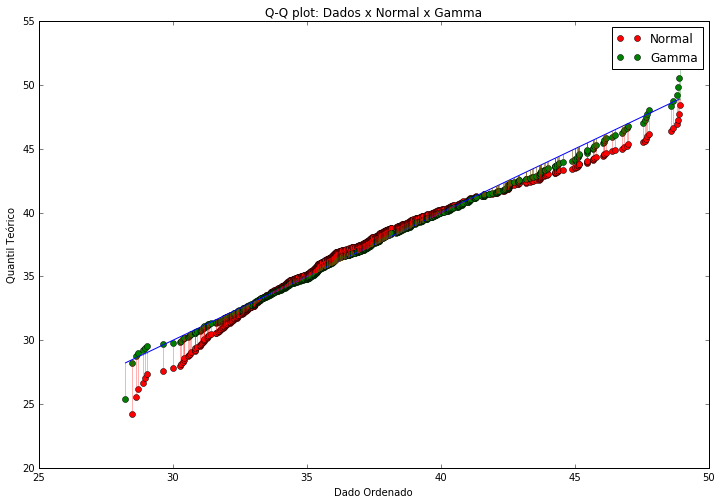

In [79]:
# Quantis Amostrais para os dados analisados
fra = [] # frequencia relativa acumulada
for i in range(len(latitude_ini)):
    acc = (i - 0.5) / len(latitude_ini)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Quantis teóricos para as distribuições analisadas
q_normal = stats.norm.ppf(fra, loc=media, scale=desvio)
q_gamma = stats.gamma.ppf(fra, scale=stats.gamma.fit(latitude_ini)[2], loc=stats.gamma.fit(latitude_ini)[1], a=stats.gamma.fit(latitude_ini)[0])

# Plotar
fig = plt.figure(figsize=(12,8))
plt.title("Q-Q plot: Dados x Normal x Gamma")
normal_plot, = plt.plot(latitude_ini, q_normal, 'o', color="red", label="Normal")
gamma_plot, = plt.plot(latitude_ini, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[normal_plot, gamma_plot])
plt.xlabel("Dado Ordenado")
plt.ylabel("Quantil Teórico")
plt.plot((min(latitude_ini), max(latitude_ini)), (min(latitude_ini), max(latitude_ini)), '-')


for i in range(len(latitude_ini)):
    plt.plot((latitude_ini[i], latitude_ini[i]), (q_normal[i], latitude_ini[i]), '-', color='red', alpha=0.3  )
    plt.plot((latitude_ini[i], latitude_ini[i]), (q_gamma[i], latitude_ini[i]), '-', color='green', alpha=0.3  )


O gráfico Q-Qplot acima apresenta uma comparação entre as diferenças dos modelos de distribuição teóricos (pontos em vermelho e verde) e os dados reias (linha azul), essa diferença pode ser observada nas retas verticais que ligam os pontos a reta. Dessa forma podemos concluir que o Modelo Gamma é o mais apropriado para essa distribuição por apresentar menor diferença entre os pontos e a reta.
___

### Testes de aderência

In [115]:
# Erro quadrático

erro_quadratico_normal = sum((latitude_ini[1:] - q_normal[1:])**2)
erro_quadratico_gamma = sum((latitude_ini - q_gamma)**2)

print("Erro quadrático da normal: {:4.3f}\n".format(erro_quadratico_normal))
print("Erro quadrático da gamma: {:4.3f}\n".format(erro_quadratico_gamma))

Erro quadrático da normal: 360.322

Erro quadrático da gamma: 55.643



In [117]:
# Erro Quadrático Médio
eqm_normal = erro_quadratico_normal/len(latitude_ini)
eqm_gamma = erro_quadratico_gamma/len(latitude_ini)

print("Erro quadratico médio da normal: {:4.3f}\n".format(eqm_normal))
print("Erro quadratico médio da gamma: {:4.3f}\n".format(eqm_gamma))

Erro quadratico médio da normal: 0.542

Erro quadratico médio da gamma: 0.084



In [116]:
# Soma das Diferenças
soma_diferenças_normal = sum(abs(latitude_ini[1:] - q_normal[1:]))
soma_diferenças_gamma = sum(abs(latitude_ini - q_gamma))

print("Soma de diferenças da normal: {:4.3f}\n".format(soma_diferenças_normal))
print("Soma de diferenças da gamma: {:4.3f}\n".format(soma_diferenças_gamma))

Soma de diferenças da normal: 374.766

Soma de diferenças da gamma: 119.987



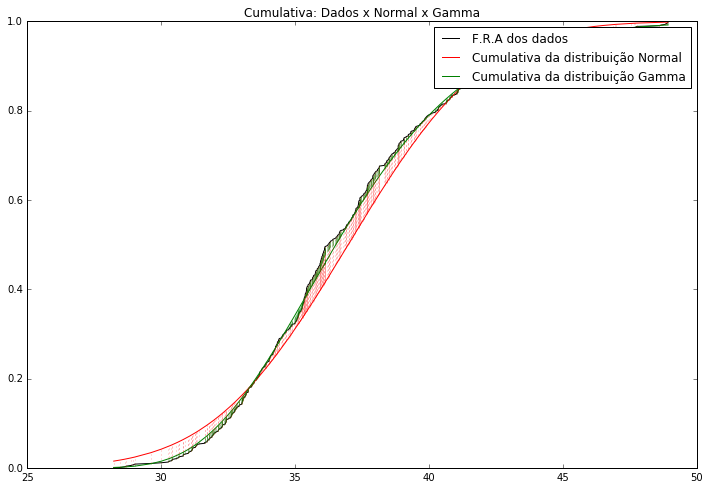

In [129]:
# Testes de aderência que usam a cumulativa
cdf_normal = stats.norm.cdf(latitude_ini, loc=media, scale=desvio)
cdf_gamma = stats.gamma.cdf(latitude_ini, scale=stats.gamma.fit(latitude_ini)[2], loc=stats.gamma.fit(latitude_ini)[1], a=stats.gamma.fit(latitude_ini)[0])


fig = plt.figure(figsize=(12,8))
plt.title("Cumulativa: Dados x Normal x Gamma")
latitude_ini_fra_plot, = plt.plot(latitude_ini, fra, '-', color='black', label="F.R.A dos dados")
cdf_normal_plot,   = plt.plot(latitude_ini, cdf_normal, '-', color='red', label = "Cumulativa da distribuição Normal")
cdf_gamma_plot, = plt.plot(latitude_ini, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[latitude_ini_fra_plot, cdf_normal_plot, cdf_gamma_plot])


for i in range(len(latitude_ini)):
    plt.plot((latitude_ini[i], latitude_ini[i]), (fra[i], cdf_normal[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((latitude_ini[i], latitude_ini[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)



Este gráfico acumulativo esta comparando a função acumuladas das distribuição teóricas e a distribuição acumulada dos dados reais, a diferença de cada modelo teórica ao real esta representado pelas retas verticais em cada ponto.
___

In [123]:
# Erro quadrático nas CDFs
erro_quad_cdf_normal = sum((fra - cdf_normal)**2)
erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da Normal versus F.R.A: {:4.3f}\n".format(erro_quad_cdf_normal))
print("Erro quadrático da CDF da Gamma versus F.R.A: {:4.3f}\n".format(erro_quad_cdf_gamma))

Erro quadrático da CDF da Normal versus F.R.A: 0.948

Erro quadrático da CDF da Gamma versus F.R.A: 0.094



In [122]:
# Diferenças absolutas
soma_difs_cdf_normal = sum( abs(fra - cdf_normal))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_normal, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 21.30676261977199 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 6.33296135873307


|Medidas Aderência|Distribuição Normal|Distribuição Gamma|
|-|-|-|
|Erro Quadrático|360.322|55.643|
|Erro Quadrático Médio|0.542|0.084|
|Soma das Diferenças|374.766|119.987|
|Erro quadrático nas CDFs|0.948|0.094|
|Diferenças absolutas|21.306|6.332|

A tabela acima apresenta uma comparação entre os erros dos modelos de distribuição Normal e Gamma. Como podemos observar os valores de aderência da distribuição Gamma são em todos os casos menores, portanto este modelo é o mais apropriado para descreve o comportamento aleatório do evento análisado.
___